<a href="https://colab.research.google.com/github/SahithyTumma/Activity-Change-Detection/blob/main/Activity_Change_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1st MEET**

Idea and the way we do this project also the methods we are going to use in this project. The data-set and basic classifications.

**PREVIOUS MEET**
1. Data understanding and feature specifications
2. Linear regression Model

**Suggestions by sir:**

Try using other methods of classifiers and show the accuracy for all the models.

**Today's MINUTES OF MEET**

1. SVM model 
2. Best performing model


***ACTIVITY CHANGE DETECTION DATASET DESCRIPTION***

---





---

The data set extracted is from 30 people,  whose daily life movements are taken while carrying a waist-mounted smartphone with embedded inertial sensors.

This data is normalised and the normalised data is only used in this experiment, we can see the proof in the upcoming data analysis.

Regular activities like **walking, walking upstairs, downwards, sitting, standing, laying are recorded**. 

There are 2 sensors embedded namely accelerometer and gyroscope for each person. The **accelerometer** sensor captures 3-axial (XYZ) **linear acceleration** at a constant rate of 50Hz whereas **gyroscope** captures  3-axial (XYZ) **angular velocity** at a constant rate of 50Hz. The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window) (digital data is being considered)

Total dataset is split into **training(70%)** (21 subjects) and **testing(30%)** (9 subjects).

***DATA ATTRIBUTES***

1. Triaxial acceleration from the accelerometer (total acceleration) estimates body acceleration.
2. Triaxial Angular velocity from the gyroscope estimates body rotational movements.
3. 561 feature vector with time and frequency domain variables along with activity labels associated  ((265(t)+289(f))-> accelerometer + (7)-> gyroscope + (2)-> labels).
4. Subjects no.2,4,9,10,12,13,18,20,24 are used for testing and remaining 21 are used for training.
5. Every aspect recorded is divided into X,Y,Z dimensions for both time and frequency domains.

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals tAcc-XYZ and tGyro-XYZ. These time domain signals (prefix 't' to denote time) were captured at a constant rate of 50 Hz. Then they were filtered using a median filter and a 3rd order low pass Butterworth filter with a corner frequency of 20 Hz to remove noise. Similarly, the acceleration signal was then separated into body and gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using another low pass Butterworth filter with a corner frequency of 0.3 Hz. 

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also the magnitude of these three-dimensional signals were calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally a Fast Fourier Transform (FFT) was applied to some of these signals producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

**These signals were used to estimate variables of the feature vector for each pattern:**

'-XYZ' is used to denote 3-axial signals in the X, Y and Z directions.

tBodyAcc-XYZ </br>
tGravityAcc-XYZ </br>
tBodyAccJerk-XYZ </br>
tBodyGyro-XYZ </br>
tBodyGyroJerk-XYZ</br>
tBodyAccMag</br>
tGravityAccMag</br>
tBodyAccJerkMag</br>
tBodyGyroMag</br>
tBodyGyroJerkMag</br>
fBodyAcc-XYZ</br>
fBodyAccJerk-XYZ</br>
fBodyGyro-XYZ</br>
fBodyAccMag</br>
fBodyAccJerkMag</br>
fBodyGyroMag</br>
fBodyGyroJerkMag</br>

**The set of variables that were estimated from these signals are:** 

**mean()**: Mean value</br>
**std():** Standard deviation</br>
**mad()**: Median absolute deviation</br> 
**max()**: Largest value in array</br>
**min()**: Smallest value in array</br>
**sma()**: Signal magnitude area</br>
**energy()**: Energy measure. Sum of the squares divided by the number of values. </br>
**iqr()**: Interquartile range</br> 
**entropy()**: Signal entropy</br>
**arCoeff()**: Autorregresion coefficients with Burg order equal to 4</br>
**correlation()**: correlation coefficient between two signals</br>
**maxInds()**: index of the frequency component with largest magnitude</br>
**meanFreq()**: Weighted average of the frequency components to obtain a mean frequency</br>
**skewness()**: skewness of the frequency domain signal</br> 
**kurtosis()**: kurtosis of the frequency domain signal </br>
**bandsEnergy()**: Energy of a frequency interval within the 64 bins of the FFT of each window.</br>
**angle()**: Angle between to vectors.

**Additional vectors obtained by averaging the signals in a signal window sample. These are used on the angle() variable:**

gravityMean</br>
tBodyAccMean</br>
tBodyAccJerkMean</br>
tBodyGyroMean</br>
tBodyGyroJerkMean</br>

1)    ***IMPORTING DATA AND LIBRARIES***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter("ignore")

In [ ]:
dfTrain = pd.read_csv('https://raw.githubusercontent.com/SahithyTumma/Activity-Change-Detection/main/train.csv')  ## dfTrain has dataset of training 
dfTest = pd.read_csv('https://raw.githubusercontent.com/SahithyTumma/Activity-Change-Detection/main/test.csv')    ## dfTest has dataset of testing 

In [ ]:
print("Size of Train dataset is:", dfTrain.shape)
print("Size of Test dataset is:", dfTest.shape)

Size of Train dataset is: (7352, 563)
Size of Test dataset is: (2947, 563)


2) ***DATA PROCESSING***

In [ ]:
df = pd.concat([dfTrain,dfTest])    ## total dataset = train + test
df.reset_index(inplace=True)        ## make changes in the original data frame itself if True.
df.drop('index',inplace=True,axis = 1)  ## can drop rows or columns in original full data
df.info()   #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
print(df.head().to_string()) ## just showing the entire table of the head

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  tBodyAcc-arCoeff()-Y,2  tBodyAcc-arCoeff()-Y,3  tBodyAcc-arCoeff()-Y,4  tBodyAcc-arCoeff()-Z,1  tBodyAcc-arCoeff()-Z,2  tBodyAcc-arCoeff()-Z,3  tBodyAcc-arCoeff()-Z,4  tBodyAcc-correlation()-X,Y  tBodyAcc-correlation()-X,Z  tBodyAcc-correlation()-Y,Z  tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-mean()-Z  tGravityAcc-std()-X  tGravityAcc-std()-Y  tGravityAcc-std()-Z  tGravityAcc-mad()-X  tGr

In [ ]:
#checking of rows and columns to the total data
print("Number of Data Points: ", df.shape[0])   ##total number of rows(total data collected for each feature)
print("Number of columns    : ", df.shape[1])  ## total number of features we took (561)+2 attributes.

Number of Data Points:  10299
Number of columns    :  563


3) **DATA CLEANING**

**Check for dublicates and null values**

In [ ]:
print("Number of duplicates in the dataframe: ", df.duplicated().sum())  #check if there is any repition in values 
print("Number of Null/NAN  values in the dataframe: ",df.isnull().sum().sum())

Number of duplicates in the dataframe:  0
Number of Null/NAN  values in the dataframe:  0


In [ ]:
count = df.Activity.value_counts()
count

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

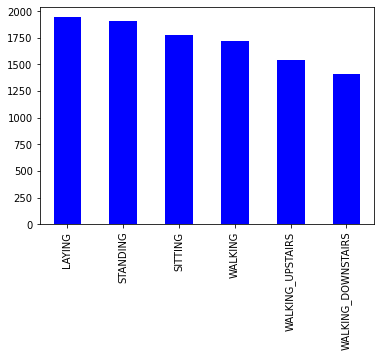

In [ ]:
count.plot.bar(color='blue')

**Check for data imbalance**

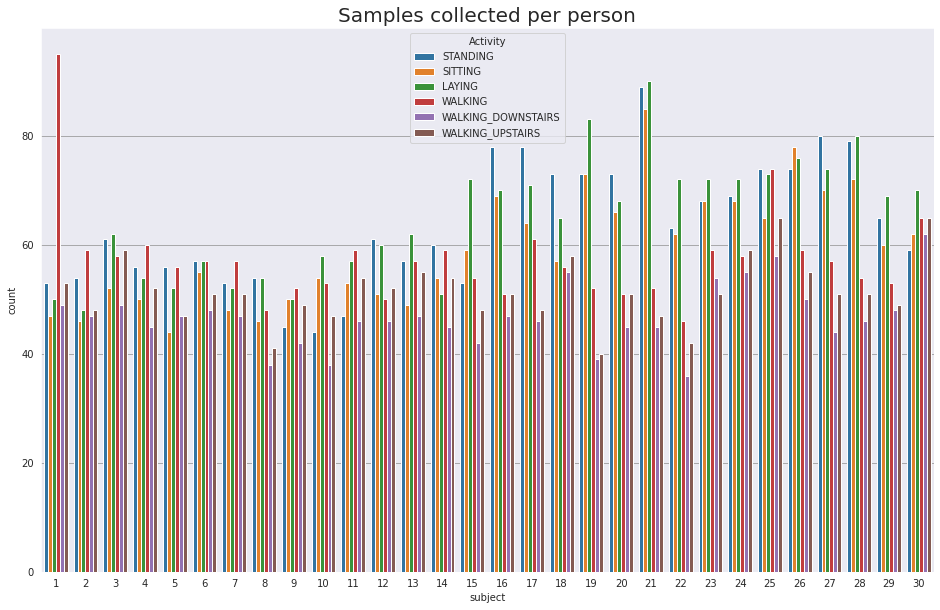

In [ ]:
sns.set_style('darkgrid',{"grid.color": ".6"})
plt.figure(figsize=(16,10))
plt.title('Samples collected per person', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()


1. From the plot, we can conclude that the data is balanced
2. Almost same number of samples were collected for all the 6 activities.
2.  There are no null values and duplicate rows, which says our data is clean 
4. Next we can proceed for the visualization and analysis of the data.




3) **DATA VISUALIZATION**

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
y = df['Activity'].copy()
X = df.drop('Activity',inplace = False, axis = 1) ##dividing the dataset into features and labels
print(y)


0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object


In [ ]:
for label in y.unique():
    print(label)

STANDING
SITTING
LAYING
WALKING
WALKING_DOWNSTAIRS
WALKING_UPSTAIRS


In [ ]:
## CHANGING COLUMNS NAMES 
columns = df.columns
columns
columns = columns.str.replace("[()]",'')
columns = columns.str.replace("-",'')
columns = columns.str.replace(",",'')
columns
# list(columns)  
# uncomment this to see all the 563 columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
df.columns = columns
df.head()  

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


3) ***DATA ANALYSIS***

**Activities**

1. Static Activities: SITTING, STANDING, LAYING
2. Dynamic Activities : WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS

**Static and Dynamic Activities**

* In static activities (sit, stand, lie down) motion information will not be very useful.
* In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.

Let's observe data of static and dynamic activities seperately through plots

Seeing the density of these activities for 2 features one in time domain and other in frequency domain for **Accelerometer** for MagMean.

Text(0.0, 1.6, 'Dynamic Activities')

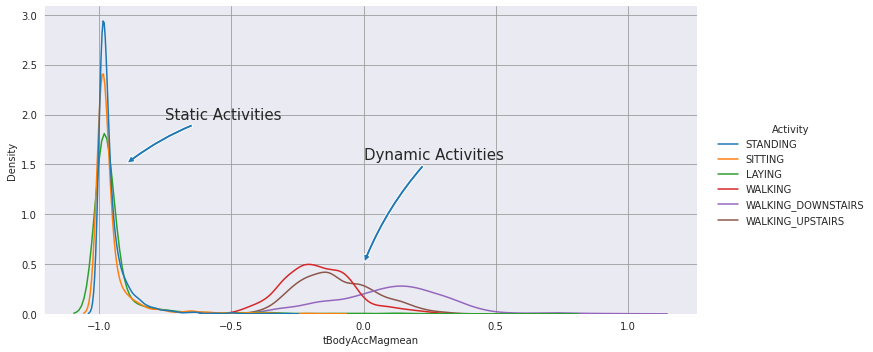

In [ ]:

sns.displot(x='tBodyAccMagmean', data=df, kind = 'kde', hue='Activity', aspect=2)
plt.annotate("Static Activities", xy=(-0.9,1.5), xytext=(-0.75, 2), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Dynamic Activities", xy = (0.0,0.5), xytext = (0.0,1.6),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))



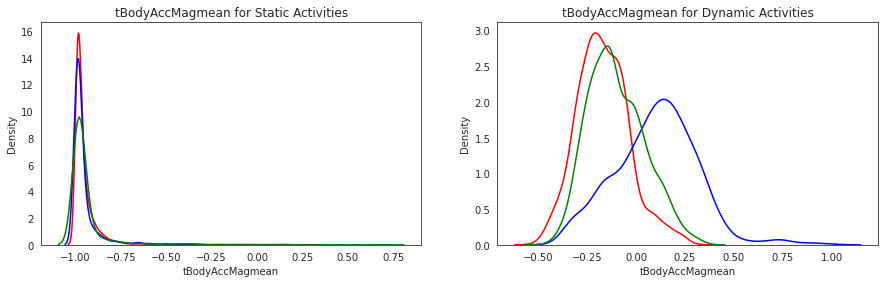

In [ ]:
df1 = df[df['Activity'] == 'STANDING']
df2 = df[df['Activity'] == 'SITTING']
df3 = df[df['Activity'] == 'LAYING']              ## activities are given different labels seperately
df4 = df[df['Activity'] == 'WALKING']
df5 = df[df['Activity'] == 'WALKING_DOWNSTAIRS']
df6 = df[df['Activity'] == 'WALKING_UPSTAIRS']

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccMagmean for Static Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label="Sitting")   ## seperate stationary with different colours
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccMagmean for Dynamic Activities')
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")  ## seperate motion with different colours
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label="Walking_upstairs")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

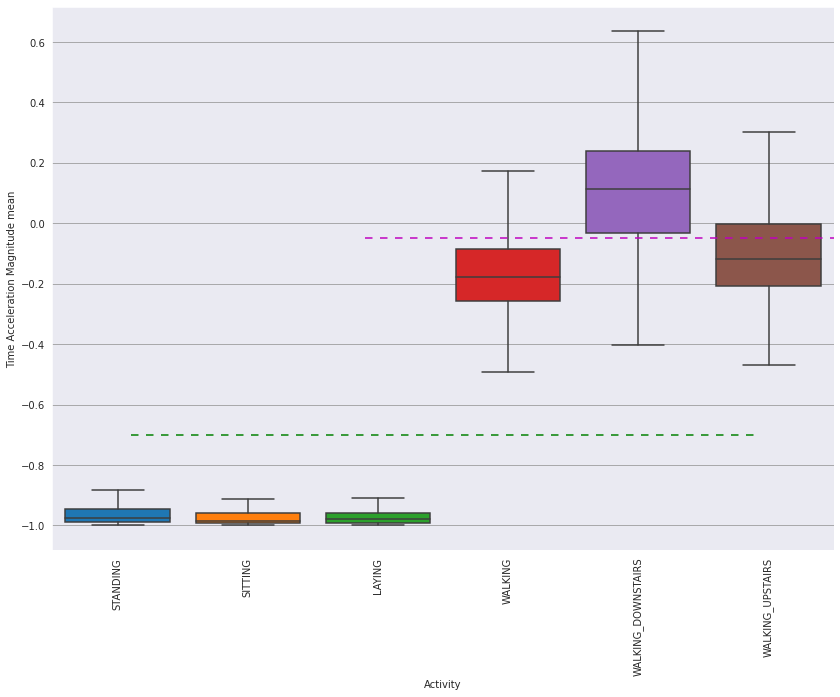

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Time Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

*We observe that:*  
1) *In time domain:*

* If tAccMean is < -0.8 then the activities are either Standing or 
Sitting or Laying.
* If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
* If tAccMean > 0.0 then the Activity is WalkingDownstairs.

Seeing the same for fBodyAccMagMean 

Text(0.0, 1.6, 'Dynamic Activities')

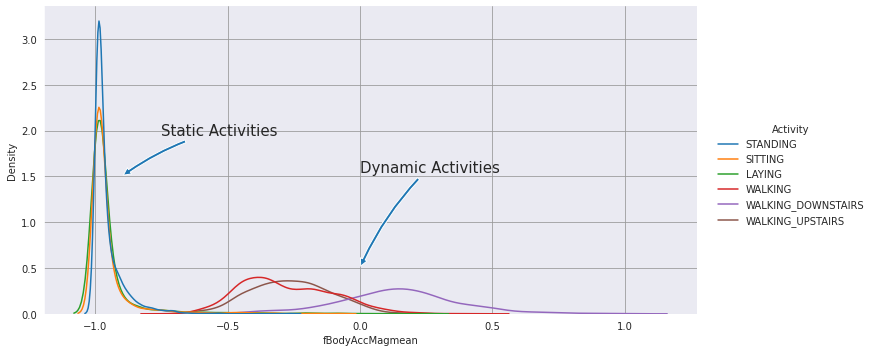

In [ ]:
sns.displot(x='fBodyAccMagmean', data=df, kind = 'kde', hue='Activity', aspect=2)
plt.annotate("Static Activities", xy=(-0.9,1.5), xytext=(-0.75, 2), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Dynamic Activities", xy = (0.0,0.5), xytext = (0.0,1.6),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))



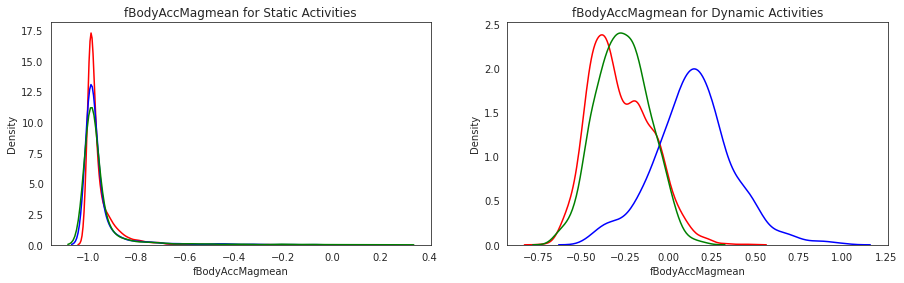

In [ ]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('fBodyAccMagmean for Static Activities')
sns.distplot(df1['fBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['fBodyAccMagmean'],color='b',hist=False,label="Sitting")   ## seperate stationary with different colours
sns.distplot(df3['fBodyAccMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('fBodyAccMagmean for Dynamic Activities')
sns.distplot(df4['fBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['fBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")  ## seperate motion with different colours
sns.distplot(df6['fBodyAccMagmean'],color='g',hist=False,label="Walking_upstairs")

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

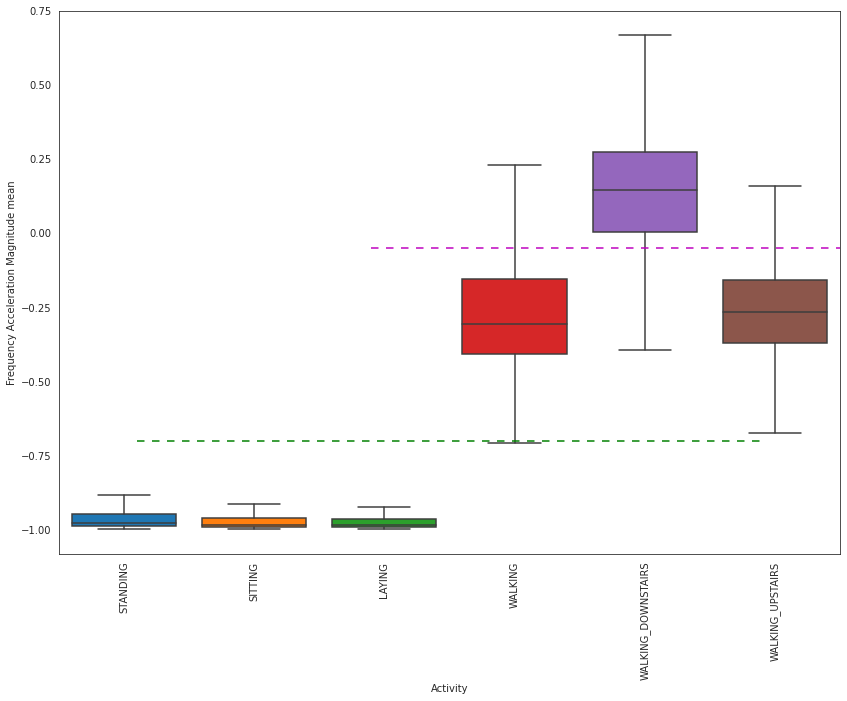

In [ ]:

plt.figure(figsize=(14,10))
sns.boxplot(x='Activity', y='fBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Frequency Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

We observe that:



*In frequency domain:*

* If fBodyAccMagmean is < -0.75 then the Activities are either Standing or Sitting or Laying.

* If fBodyAccMagmean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

* If fBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.

Now let us see these density plots for other randomly picked features, here we took "tBodyAccJerkMagmean" and "tBodyAccstdY"

**Based on the above plots, we observe that:**

1) All features value is in range (-1,1) so our data is normalised.

2) Distributions of static and moving activities are completly seperable.

Now let us use boxplot to see the values above or below which we can observe the change for both stationary and moving activities.

Before that let us see closely the stationary and moving activities seperately so that we can use them for seperation in our boxplot.

Now let us see the boxplot and observe:

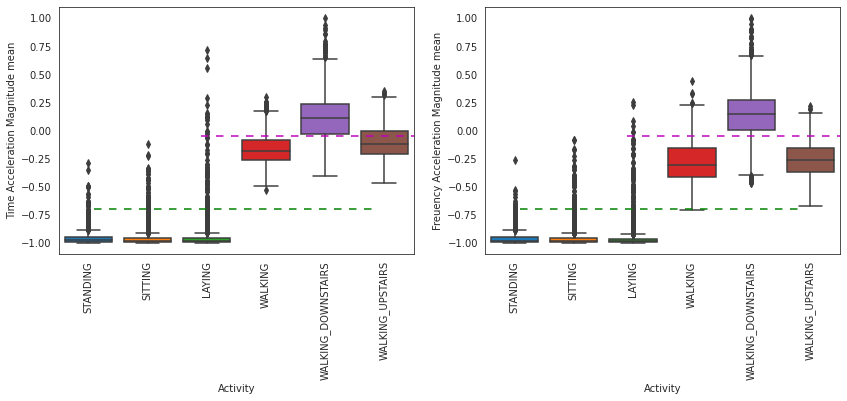

In [ ]:

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=True, saturation=1)
plt.ylabel('Time Acceleration Magnitude mean')                ## tBodyAccMagmean
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')   ## plot a line to distinguish the higher values with lower ones
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')           ## plot a line to distinguish these above three values 
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y='fBodyAccMagmean',data=df,showfliers=True,saturation=1)
plt.ylabel('Freuency Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

We observe that:

1) *In time domain:*

* If tAccMean is < -0.8 then the activities are either Standing or 
Sitting or Laying.
* If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
* If tAccMean > 0.0 then the Activity is WalkingDownstairs.

2)*In frequency domain:*

* If fBodyAccMagmean is < -0.75 then the Activities are either Standing or Sitting or Laying.

* If fBodyAccMagmean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.

* If fBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.

**Let us see about gyroscope values and their classifications now:**


---




(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

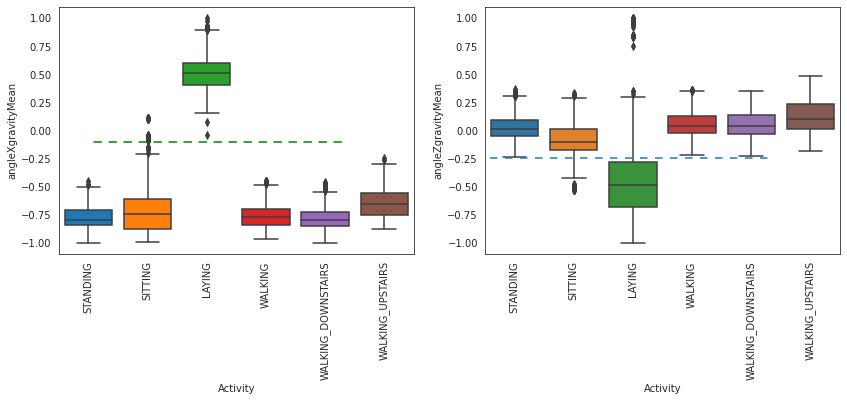

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y= 'angleXgravityMean',data = df,showfliers=True, saturation=1)
plt.axhline(y=-0.1, xmin = 0.1, xmax= 0.8, dashes=(5,5), c='g',animated = True,dash_capstyle = 'round')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y= 'angleZgravityMean', data = df)
plt.axhline(y=-0.24, xmin=-1, xmax = 0.8, dashes = (5,5))
plt.xticks(rotation = 90)

* If angleXgravityMean > 0 then Activity is Laying.
* If angleZgravityMean < -0.25 then the Activity is Laying.

**Observations**

* All features are some how differentiate w.r.t. moving activities and stationary activities

* Body acceleration along X axis w.r.t. Time domain and Frequency domain features helps to conclude walking downstairs activity is differentiable w.r.t. moving activities

It seems to be like we can distinguish all the activities from this boxplot, but there may exist few local variances, which can't be observed from an over view, so we need to confirm mathematically using **t-SNE** plot. 

What is t-SNE?

t-SNE is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization.

Reference: t-SNE is a nonlinear dimensionality reduction technique that is well suited for embedding high dimension data into lower dimensional data (2D or 3D) for data visualization

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:
%%time
tsne = TSNE(n_components = 2)   ## 2 dimensional compression
tsneComponents = tsne.fit_transform(X)  ##all the transformed components are stored in tsnecomponents

CPU times: user 2min 9s, sys: 797 ms, total: 2min 10s
Wall time: 1min 12s


In [ ]:
tsneComponents.shape  ## shape of the compressed data

(10299, 2)

In [ ]:
tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2']) ##write the transformed data into two components


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.004s...
[t-SNE] Computed neighbors for 10299 samples in 3.107s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 0.680255
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.915970
[t-SNE] KL d

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.109s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.115070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.817184
[t-SNE] KL divergence after 1000 iterations: 1.417790
[t-SNE] Computing 31 nearest neighbors...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.336517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.072449
[t-SNE] KL divergence after 1000 iterations: 1.203856
[t-SNE] Computing 61 nearest neighbors...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.542361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.778076
[t-SNE] KL divergence after 1000 iterations: 1.006154
[t-SNE] Computing 91 nearest neighbors...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.103s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.661688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.894341
[t-SNE] KL divergence after 1000 iterations: 0.913898
[t-SNE] Computing 121 nearest neighbors...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.746680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.621834
[t-SNE] KL divergence after 1000 iterations: 0.875855
[t-SNE] Computing 151 nearest neighbors...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.812791
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.900681
[t-SNE] KL divergence after 1000 iterations: 0.823264
[t-SNE] Computing 181 nearest neighbors...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.214s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.867056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.753540
[t-SNE] KL divergence after 1000 iterations: 0.784801
[t-SNE] Computing 241 nearest neighbors...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.306s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.954281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.832726
[t-SNE] KL divergence after 1000 iterations: 0.725067
[t-SNE] Computing 301 nearest neighbors...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10299 samples in 3.369s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 2.024747
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.753353
[t-SNE] KL divergence after 1000 iterations: 0.694166
CPU times: user 22min 51s, sys: 12 s, tota

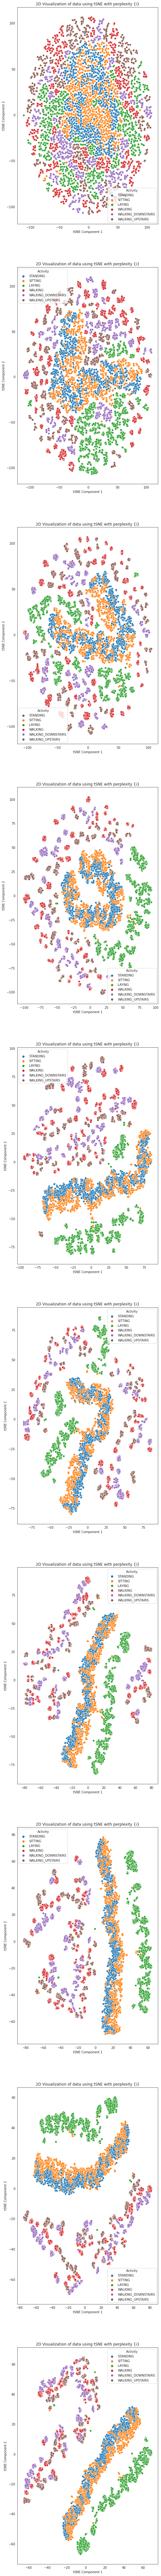

In [ ]:
%%time
perplexities =[2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,150))
for i, p in enumerate(perplexities):  ##takes a collection (e.g. a tuple) and returns it as an enumerate object. 
  tsne = TSNE(n_components = 2, perplexity=p,verbose=1)
  tsneComponents = tsne.fit_transform(X)
  tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])
  plt.subplot(10,1,i+1) ## for each iteration
  sns.scatterplot(x= 'tsneComponent1', y = 'tsneComponent2', hue=y, data=tsneDataFrame)
  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('2D Visualization of data using tSNE with perplexity {i}')

tSNE cannot differentiate static activities standing, sitting clearly. So now to choose our model, we can take logistic regression model, as we can distinguish one label to other using a very flexible curve as we know $\frac{1}{1+e^{-x}}$.So we can clearly make up more accuracy using this model. 

So for this to happen, we need to makeup our train and test datas,


**Split data into Train, Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [ ]:
print("Number of data points in Train", X_train.shape)
print("Number of data points in Train", y_train.shape)
print("Number of data points in Test", X_test.shape)
print("Number of data points in Test", y_test.shape)
print("Number of data points in CV", X_cv.shape)
print("Number of data points in CV", y_cv.shape)


Number of data points in Train (6591, 562)
Number of data points in Train (6591,)
Number of data points in Test (2060, 562)
Number of data points in Test (2060,)
Number of data points in CV (1648, 562)
Number of data points in CV (1648,)


In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']


**MACHINE LEARNING MODELS**

In [ ]:
from sklearn import linear_model
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import GridSearchCV

*PLOT CONFUSION MATRIX*

In [ ]:
##OPLOTTING CONFUSION MATRX
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

*PERFORM MODEL*

In [ ]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                print_cm=True, cm_cmap=plt.cm.Greens):
    
    
   # to store results at various phases
    results = dict()
    
   # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
       print('--------------------')
       print('| Confusion Matrix |')
       print('--------------------')
       print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    

*BEST ESTIMATOR, PARAMETERS, CV SUBSET*

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

**LOGISTIC REGRESSION MODEL**

training the model..
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:00:30.479695


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.019643


---------------------
|      Accuracy      |
---------------------

    0.9771844660194174


--------------------
| Confusion Matrix |
--------------------

 [[386   3   0   0   0   0]
 [  0 346  26   0   0   0]
 [  0  12 363   0   0   0]
 [  0   0   0 345   0   0]
 [  0   0   0   1 279   2]
 [  0   0   0   2   1 294]]


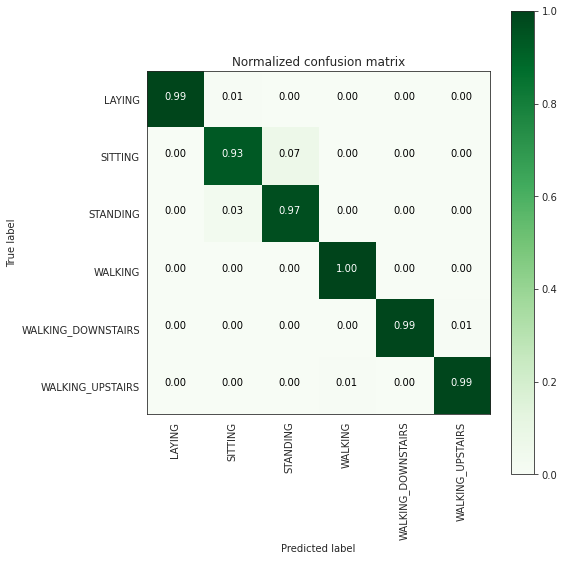

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       389
           SITTING       0.96      0.93      0.94       372
          STANDING       0.93      0.97      0.95       375
           WALKING       0.99      1.00      1.00       345
WALKING_DOWNSTAIRS       1.00      0.99      0.99       282
  WALKING_UPSTAIRS       0.99      0.99      0.99       297

          accuracy                           0.98      2060
         macro avg       0.98      0.98      0.98      2060
      weighted avg       0.98      0.98      0.98      2060



In [ ]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3 ], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.975876194811106



**SVM Model**



training the model..
Done 
 

testing time(HH:MM:SS:ms) - 0:00:01.348561


---------------------
|      Accuracy      |
---------------------

    0.9917475728155339


--------------------
| Confusion Matrix |
--------------------

 [[389   0   0   0   0   0]
 [  0 361  11   0   0   0]
 [  0   6 369   0   0   0]
 [  0   0   0 345   0   0]
 [  0   0   0   0 282   0]
 [  0   0   0   0   0 297]]


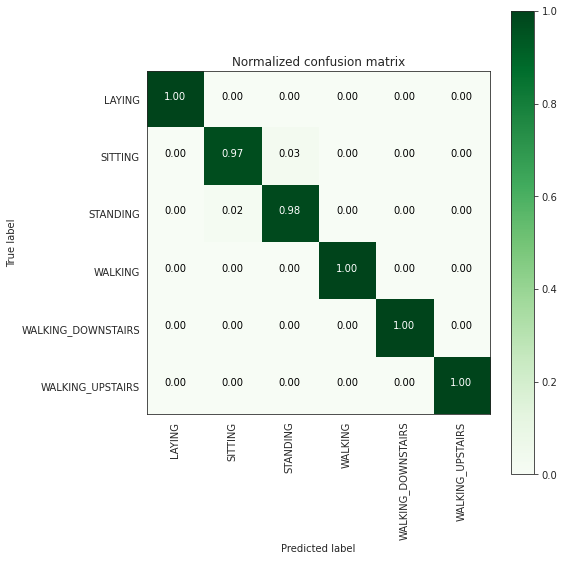

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       389
           SITTING       0.98      0.97      0.98       372
          STANDING       0.97      0.98      0.98       375
           WALKING       1.00      1.00      1.00       345
WALKING_DOWNSTAIRS       1.00      1.00      1.00       282
  WALKING_UPSTAIRS       1.00      1.00      1.00       297

          accuracy                           0.99      2060
         macro avg       0.99      0.99      0.99      2060
      weighted avg       0.99      0.99      0.99      2060



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf') #non-linear hyperplane
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9881654953113189



In [ ]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 97.72%       2.282%
rbf SVM classifier  : 99.17%      0.8252% 
